In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

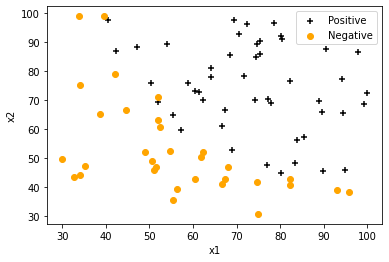

In [4]:
def plotData(X,Y):
    data_frame_X1 = data_logistic[data_logistic['label']== 0]
    data_frame_X2 = data_logistic[data_logistic['label']== 1]
    plt.scatter(data_frame_X2["x1"], data_frame_X2["x2"], marker = "+", color = "black", label = "Positive")
    plt.scatter(data_frame_X1["x1"], data_frame_X1["x2"], marker = "o", color = "orange", label = "Negative")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc = 1)
    
data_logistic = pd.read_csv("data_logistic.xls")
X = data_logistic.iloc[:,0:2]
Y = data_logistic.iloc[:,2]
plotData(X,Y)
plt.show()

In [5]:
import math
def sigmoid(z):
  g = 1/(1+(math.e ** (-z)))
  return g

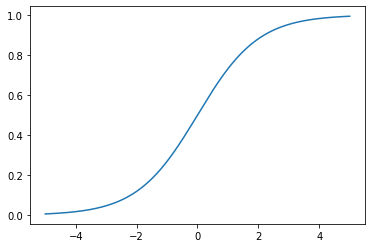

In [6]:
xx = np.linspace(-5,5,1000)
plt.plot(xx, sigmoid(xx))


In [7]:
def cal_cost(theta, X, y):
    eps = 1e-15
    htheta = sigmoid(np.dot(X,theta))
    term1 = np.dot(np.log(htheta), y)
    term2 = np.dot(np.log(1 - htheta+eps), (1 - y) )
    J = - 1 / m * (term1 + term2) 
    
    return J

def cal_grad(theta, X, y):
    htheta = sigmoid(np.dot(X,theta))
    term1 = np.dot(X.T , (htheta - y)) 
    grad = 1 / m * term1
    
    return grad


m,n = np.shape(X)

X = np.hstack((np.ones((m, 1)), X)) 

initial_theta = np.zeros(n+1) 

J = cal_cost(initial_theta, X, Y)
grad = cal_grad(initial_theta, X, Y)
    
print ('Cost at initial theta: {0}'.format(J))
print ('Gradient at inital theta:\n {0}'.format(grad))


Cost at initial theta: 0.6931471805599445
Gradient at inital theta:
 [ -0.1        -10.91242026 -11.73652937]


In [8]:
theta = initial_theta
lr =  0.001
epochs = 80000

for epoch in range(epochs):
    J = cal_cost(theta, X, Y)
    grad = cal_grad(theta, X, Y)
    theta = theta - lr * grad

print ('Theta: {0}'.format(theta))
print ('Cost: {0}'.format(cal_cost(theta, X, Y)))


Theta: [-3.88329777  0.02947987  0.03935448]
Cost: 0.43838894881827817


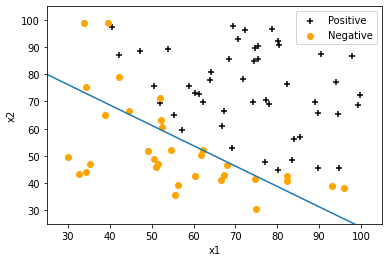

In [9]:
def plotDecisionBoundary(theta, X, y):
    plotData(X[:, 1:], y)
    xx = np.array([np.min(X[:,0:2]), np.max(X[:,0:2])])
    yy = -(theta[1] * xx + theta[0])/theta[2]
    plt.plot(xx, yy) 
    plt.xlim([25, 105])
    plt.ylim([25, 105])
    

plotDecisionBoundary(theta, X,Y)
plt.show()


In [10]:
def psigmoid(z):
    g = 1/(1-(math.e ** (-z)))
    return g

def predict(theta, X):
    m = X.shape
    p = np.zeros(m)

    htheta = psigmoid(np.dot(X, theta))
    p = htheta >= 0.5

    return p

p = predict (theta, X)
vals = np.array([1,56,32])
prob = sigmoid(np.dot(vals, theta))

print ('Training Accuracy: {0}'.format(np.mean(p==Y)*100))
print ('Probablity of acceptance for exam 1 score: {0} and exam 2 score: {1} is {2} percent.'.format(vals[1], vals[2], prob*100))


Training Accuracy: 85.0
Probablity of acceptance for exam 1 score: 56 and exam 2 score: 32 is 27.426661618176123 percent.


In [11]:
def cal_reg_cost(theta, X, y, lam):

    lamarray = np.ones(len(theta)) * lam
    
    lamarray[0] = 0.0
    eps = 1e-15

    htheta = sigmoid(np.dot(X,theta))
        
    term1 = np.dot(np.log(htheta), y)
    term2 = np.dot(np.log(1 - htheta+eps), (1 - y) )
    term3 = lam/(2*m) * np.sum(htheta**2)

    J = - 1 / m * (term1 + term2 - term3) 
    
    return J

def cal_reg_grad(theta, X, y, lam):

    lamarray = np.ones(len(theta)) * lam
    lamarray[0] = 0.0

    htheta = sigmoid(np.dot(X,theta))
    
    theta[0] = 0
    term1 = np.dot(X.T , (htheta - y))/m
    term2 = lam * theta
    grad = term1 + term2 / m

    
            
    return grad
    
initial_theta = np.zeros(n+1)

lam = 1

J = cal_reg_cost(initial_theta, X, Y, lam)
grad = cal_reg_grad(initial_theta, X, Y, lam)
print ('Cost at initial theta: {0}'.format(J))
print ('Gradient at inital theta:\n {0}'.format(grad))



Cost at initial theta: 0.6947096805599445
Gradient at inital theta:
 [ -0.1        -10.91242026 -11.73652937]


In [12]:
theta = initial_theta
lr =  0.001 
lam = 1
epochs = 80000


for epoch in range(epochs):
    J = cal_reg_cost(theta, X, Y, lam)
    grad = cal_reg_grad(theta, X, Y, lam)
    theta = theta - lr * grad
    
print ('Best fit theta: {0}'.format(theta))
print ('Cost function at best fit theta: {0}'.format(cal_reg_cost(theta, X, Y, lam)))


Best fit theta: [-6.53733976e-05 -4.74547051e-04  1.10433960e-02]
Cost function at best fit theta: 0.6354214665769797
